# Linear Intepolation

Based on Two Sigma Hacker Rank test

Rules:
- If xLow < x < xAb then normal interpolation
- If there's a x tie: minimum of y on the left, maximum of y on the right
- If x is outside the range of \[ min(xKnots), max(xKnots) \] use extrapolation 

## Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use('seaborn')

## Two Stacks Data Structure

In [31]:
class NearestAboveStack:
    
    def __init__(self, t):
        
        self.t = t
        self.xAb = None
        self.yAb = None
    
    def add(self, px, py):
        
        if px < self.t:
            return None
        
        if self.xAb is None and self.yAb is None:
            self.xAb, self.yAb = px, py
        
        if px == self.xAb and py > self.yAb:
            self.yAb = py
        elif px < self.xAb:
            self.xAb, self.yAb = px, py
        
        return None
    
    def get_point(self):
        return self.xAb, self.yAb
    

In [32]:
### Testing
stack = NearestAboveStack(2)

tests = [ # inputs of add, expected results
    ( (1, 2), (None, None) ),
    ( (5, 2), (5, 2) ),
    ( (4, 3), (4, 3) ),
    ( (4, 10), (4, 10) ),
    ( (4, 2), (4, 10) ),
    ( (3, 1), (3, 1) ),
]

for (x, y), expectedResult in tests:
    
    stack.add(x, y)
    assert( stack.get_point() == expectedResult )

In [33]:
class NearestBelowStack:
    
    def __init__(self, t):
        
        self.t = t
        self.xBl = None
        self.yBl = None
    
    def add(self, px, py):
        
        if px >= self.t:
            return None

        if self.xBl is None and self.yBl is None:
            self.xBl, self.yBl = px, py

        if px == self.xBl and py < self.yBl:
            self.yBl = py
        elif px > self.xBl:
            self.xBl, self.yBl = px, py
        
        return None
    
    def get_point(self):
        return self.xBl, self.yBl
    

In [34]:
### Testing
stack = NearestBelowStack(2)

tests = [ # inputs of add, expected results
    ( (5, 0), (None, None) ),
    ( (0, 3), (0, 3) ),
    ( (0, 2), (0, 2) ),
    ( (0, 5), (0, 2) ),
    ( (1, -1), (1, -1) ),
]

for (x, y), expectedResult in tests:
    
    stack.add(x, y)
    assert( stack.get_point() == expectedResult )

In [35]:
class LinearInterpolationStack:
    
    def __init__(self, t):
        
        self.t = t
        self.below = NearestBelowStack(t)
        self.above = NearestAboveStack(t)
        
    def add(self, px, py):
        
        self.below.add(px, py)
        self.above.add(px, py)
        
    def get_below_point(self):
        return self.below.get_point()
        
    def get_above_point(self):
        return self.above.get_point()
    
    def interpolate(self):
        
        xBl, yBl = self.get_below_point()
        xAb, yAb = self.get_above_point()
        
        if xBl == self.t:
            return yBl
        elif xAb == self.t:
            return yAb
        else:
            weightBl = (self.t - xBl) / (xAb - xBl)
            return yBl * weightBl + yAb * (1 - weightBl)
      

In [37]:
### Testing

tests = [ # t, knots, expectedResult
    [2, [(0, 0), (4, 4)], 2],
    [2, [(0, 0), (2, 10)], 10],
    [2, [(-1, -1), (0, 0), (4, 4), (6, 3)], 2],
    [2, [(0, 0), (0, 4), (4, 4)], 2],
    [2, [(0, 0), (4, 0), (4, 4)], 2],
]

for k, (t, knots, expectedResult) in enumerate(tests):
    
    stack = LinearInterpolationStack(t)
    
    for x, y in knots:
        stack.add(x, y)
    
    assert(stack.interpolate() == expectedResult)

# Data Structure Function

In [54]:
def plot_linear_interpolation(xKnots, yKnots, t, stack):
    
    yt = stack.interpolate()
    
    plt.scatter(xKnots, yKnots, color='C1')

    xBl, yBl = stack.get_below_point()
    xAb, yAb = stack.get_above_point()
    
    plt.plot([xBl, xAb], [yBl, yAb], color='C0')
    
    plt.plot(t, yt, 'o', color='C2')
    
    plt.show()

In [55]:
def linear_interpolation(xKnots, yKnots, t, plot=False):
    
    if t < min(xKnots):
        raise NotImplementedError("Please implement extrapolation")
    elif t > max(xKnots):
        raise NotImplementedError("Please implement extrapolation")
    else:
        
        stack = LinearInterpolationStack(t)
        
        for x, y in zip(xKnots, yKnots):
            stack.add(x, y)
            
        if plot:
            plot_linear_interpolation(xKnots, yKnots, t, stack)
        
        return stack.interpolate()
    

# Sorting Interpolation

# Tests

## Simple Linear Interpolation

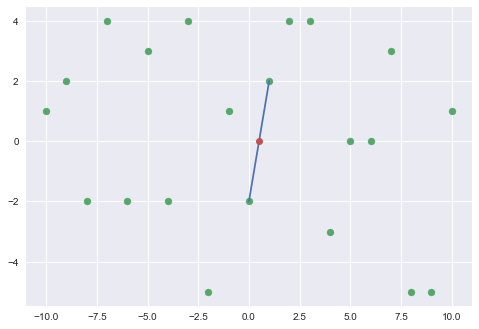

In [73]:
xKnots = np.arange(-10, 11)
yKnots = np.random.randint(-5, 5, len(xKnots))
t = 0.5

linear_interpolation(xKnots, yKnots, t, True);

## Linear Interpolation with ties handling

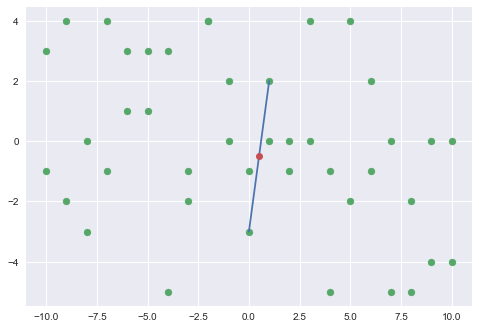

In [75]:
xKnots = 2 * list(np.arange(-10, 11))
yKnots = np.random.randint(-5, 5, len(xKnots))
t = 0.5

linear_interpolation(xKnots, yKnots, t, True);